In [1]:
# loading boston dataset from sklearn
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [2]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
# print(boston_df.head())
# print(boston_df.describe())

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [3]:
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
X = boston_df.drop('MEDV', axis=1).values
y = boston_df['MEDV'].values

print(X.shape)

# X_tr,X_te,y_tr,y_te = train_test_split(X,Y,test_size=0.2,random_state=0)
tr = range(0, len(X), 2)
te = range(1, len(X), 2)
X_tr, X_te = X[tr], X[te]
y_tr, y_te = y[tr], y[te]

(506, 13)


In [5]:
from mklaren.kernel.kinterface import Kinterface
from mklaren.kernel.kernel import rbf_kernel

K = Kinterface(data=X_tr, kernel=rbf_kernel, kernel_args={"sigma": 30})
K.shape

(253, 253)

In [6]:
from mklaren.mkl.mklaren import Mklaren
from mklaren.kernel.kernel import linear_kernel, poly_kernel

K_exp  = Kinterface(data=X_tr, kernel=rbf_kernel,  kernel_args={"sigma": 30})  # RBF kernel 
K_poly = Kinterface(data=X_tr, kernel=poly_kernel, kernel_args={"p": 3})      # polynomial kernel with degree=3
K_lin  = Kinterface(data=X_tr, kernel=linear_kernel)  
model = Mklaren(rank=15, lbd=1, delta=30)
model.fit([K_exp, K_lin, K_poly], y_tr)
yp = model.predict([X_te, X_te, X_te])
print ("Test RMSE:", np.var(y_te-yp)**0.5)

Test RMSE: 7.667594064261


/Users/macbook/Documents/WorkSpace/Experiments_TKL/mklaren/mklaren/projection/csi.py:21: UserWarning: Install module 'oct2py' to use the CSI method.
  warnings.warn("Install module 'oct2py' to use the CSI method.")
/Users/macbook/Documents/WorkSpace/Experiments_TKL/mklaren/mklaren/mkl/mklaren.py:391: RuntimeWarning: divide by zero encountered in scalar divide
  G[j, k] = (1.0 / G[i, k]) * (K[j, i] - G[j, :k].dot(G[i, :k].T))
/Users/macbook/Documents/WorkSpace/Experiments_TKL/mklaren/mklaren/mkl/mklaren.py:391: RuntimeWarning: invalid value encountered in multiply
  G[j, k] = (1.0 / G[i, k]) * (K[j, i] - G[j, :k].dot(G[i, :k].T))


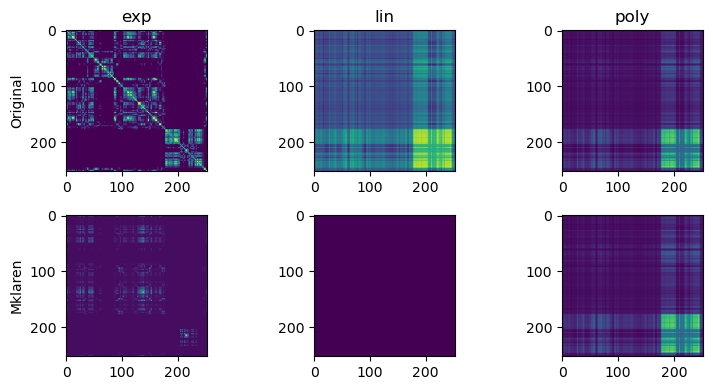

In [7]:
G_exp = model.data[0]["G"]
G_lin = model.data[1]["G"]
G_poly = model.data[2]["G"]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 4))
for i, (name, K, G) in enumerate(zip(["exp", "lin", "poly"], 
                               [K_exp, K_lin, K_poly], 
                               [G_exp, G_lin, G_poly])):
    ax[0, i].set_title(name)
    ax[0, i].imshow(K[:, :])
    ax[1, i].imshow(G.dot(G.T))

ax[0, 0].set_ylabel("Original")
ax[1, 0].set_ylabel("Mklaren")
fig.tight_layout()
plt.show()

In [9]:
G_lin

array([], shape=(253, 0), dtype=float64)

In [8]:
# Use the model to predict the test data
yp = model.predict([X_te, X_te, X_te])
print ("Test RMSE:", np.var(y_te-yp)**0.5)
# print ("Test RMSE:", np.var(y_te-yp)**0.5)


Test RMSE: 7.667594064261
